<a href="https://colab.research.google.com/github/georgezoto/TensorFlow-in-Practice/blob/master/C3W3_1_2_3_IMDB_Subwords_8K_with_Single_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# C3W3-1-IMDB Subwords 8K with Single Layer LSTM

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete71BMQ7/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete71BMQ7/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete71BMQ7/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)

#train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
#test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

#train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
#test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

#e = train_dataset.element_spec
#train_dataset = train_dataset.padded_batch(BATCH_SIZE, (e[0].shape, e[1].shape))
#e = test_dataset.element_spec
#test_dataset = test_dataset.padded_batch(BATCH_SIZE, (e[0].shape, e[1].shape))

#https://www.tensorflow.org/tutorials/text/word_embeddings
#Note: As of TensorFlow 2.2 the padded_shapes argument is no longer required. The default behavior is to pad all axes to the longest in the batch.
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 62s 157ms/step - loss: 0.5427 - accuracy: 0.7161 - val_loss: 0.4753 - val_accuracy: 0.8075
Epoch 2/10
391/391 [==============================] - 61s 156ms/step - loss: 0.3640 - accuracy: 0.8532 - val_loss: 0.4679 - val_accuracy: 0.7787
Epoch 3/10
391/391 [==============================] - 61s 156ms/step - loss: 0.4390 - accuracy: 0.7947 - val_loss: 0.5358 - val_accuracy: 0.7446
Epoch 4/10
391/391 [==============================] - 61s 156ms/step - loss: 0.5469 - accuracy: 0.7355 - val_loss: 0.7062 - val_accuracy: 0.5128
Epoch 5/10
391/391 [==============================] - 60s 155ms/step - loss: 0.5981 - accuracy: 0.6747 - val_loss: 0.6121 - val_accuracy: 0.6558
Epoch 6/10
391/391 [==============================] - 61s 155ms/step - loss: 0.3951 - accuracy: 0.8351 - val_loss: 0.4618 - val_accuracy: 0.7971
Epoch 7/10
391/391 [==============================] - 61s 157ms/step - loss: 0.3552 - accuracy: 0.8409 - val_loss: 0.5463 - val_ac

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

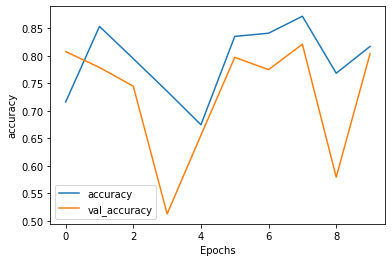

In [0]:
plot_graphs(history, 'accuracy')

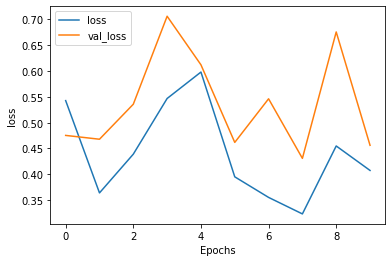

In [0]:
plot_graphs(history, 'loss')

# C3W3-2-IMDB Subwords 8K with Multi Layer LSTM

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 313s 801ms/step - loss: 0.5384 - accuracy: 0.7152 - val_loss: 0.4237 - val_accuracy: 0.8116
Epoch 2/10
391/391 [==============================] - 311s 794ms/step - loss: 0.3392 - accuracy: 0.8636 - val_loss: 0.4248 - val_accuracy: 0.8074
Epoch 3/10
391/391 [==============================] - 309s 791ms/step - loss: 0.3143 - accuracy: 0.8792 - val_loss: 0.4310 - val_accuracy: 0.8272
Epoch 4/10
391/391 [==============================] - 307s 784ms/step - loss: 0.3318 - accuracy: 0.8561 - val_loss: 0.4944 - val_accuracy: 0.7874
Epoch 5/10
391/391 [==============================] - 304s 777ms/step - loss: 0.3195 - accuracy: 0.8743 - val_loss: 0.3837 - val_accuracy: 0.8321
Epoch 6/10
391/391 [==============================] - 304s 778ms/step - loss: 0.2022 - accuracy: 0.9260 - val_loss: 0.3462 - val_accuracy: 0.8606
Epoch 7/10
391/391 [==============================] - 303s 775ms/step - loss: 0.1367 - accuracy: 0.9533 - val_loss: 0.4119 -

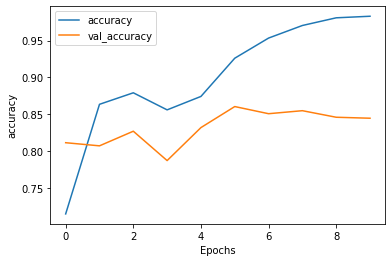

In [0]:
plot_graphs(history, 'accuracy')

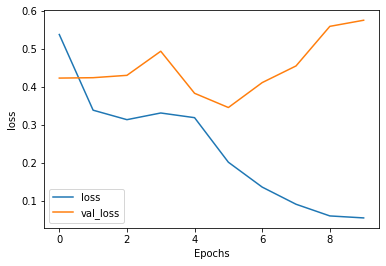

In [0]:
plot_graphs(history, 'loss')

# C3W3-3-IMDB Subwords 8K with 1D Convolutional Layer

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 48s 122ms/step - loss: 0.4450 - accuracy: 0.7822 - val_loss: 0.3042 - val_accuracy: 0.8740
Epoch 2/10
391/391 [==============================] - 27s 69ms/step - loss: 0.2238 - accuracy: 0.9137 - val_loss: 0.3145 - val_accuracy: 0.8708
Epoch 3/10
391/391 [==============================] - 24s 62ms/step - loss: 0.1708 - accuracy: 0.9386 - val_loss: 0.3271 - val_accuracy: 0.8720
Epoch 4/10
391/391 [==============================] - 24s 61ms/step - loss: 0.1374 - accuracy: 0.9522 - val_loss: 0.3525 - val_accuracy: 0.8677
Epoch 5/10
391/391 [==============================] - 23s 59ms/step - loss: 0.1103 - accuracy: 0.9623 - val_loss: 0.4270 - val_accuracy: 0.8646
Epoch 6/10
391/391 [==============================] - 22s 57ms/step - loss: 0.0858 - accuracy: 0.9715 - val_loss: 0.4918 - val_accuracy: 0.8604
Epoch 7/10
391/391 [==============================] - 23s 58ms/step - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.5923 - val_accuracy

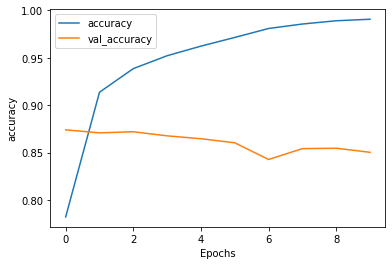

In [0]:
plot_graphs(history, 'accuracy')

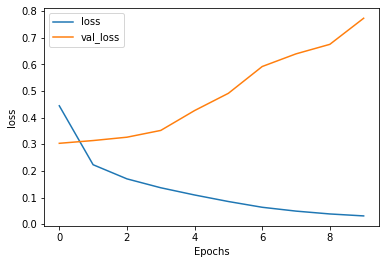

In [0]:
plot_graphs(history, 'loss')

# C3W3-3-IMDB Subwords 8K with Multi 1D Convolutional Layer

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         49280     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 622,529
Trainable params: 622,529
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 65s 166ms/step - loss: 0.4483 - accuracy: 0.7740 - val_loss: 0.3145 - val_accuracy: 0.8790
Epoch 2/10
391/391 [==============================] - 41s 105ms/step - loss: 0.2204 - accuracy: 0.9196 - val_loss: 0.3196 - val_accuracy: 0.8760
Epoch 3/10
391/391 [==============================] - 37s 96ms/step - loss: 0.1581 - accuracy: 0.9426 - val_loss: 0.3397 - val_accuracy: 0.8792
Epoch 4/10
391/391 [==============================] - 36s 92ms/step - loss: 0.1159 - accuracy: 0.9601 - val_loss: 0.4028 - val_accuracy: 0.8709
Epoch 5/10
391/391 [==============================] - 35s 90ms/step - loss: 0.0832 - accuracy: 0.9717 - val_loss: 0.5133 - val_accuracy: 0.8694
Epoch 6/10
391/391 [==============================] - 35s 89ms/step - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.5933 - val_accuracy: 0.8642
Epoch 7/10
391/391 [==============================] - 35s 88ms/step - loss: 0.0475 - accuracy: 0.9838 - val_loss: 0.6594 - val_accurac

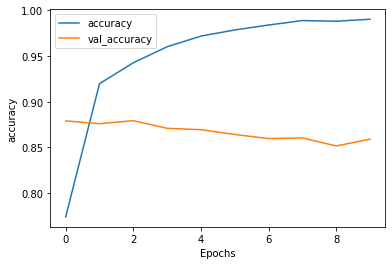

In [0]:
plot_graphs(history, 'accuracy')

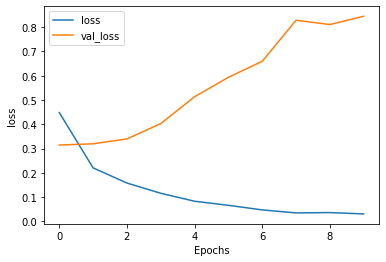

In [0]:
plot_graphs(history, 'loss')

# WINNER 89% validation accuracy
# C3W3-3-IMDB Subwords 8K with 1D Convolutional Layer and Dropout

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 23s 59ms/step - loss: 0.4836 - accuracy: 0.7563 - val_loss: 0.3197 - val_accuracy: 0.8783
Epoch 2/10
391/391 [==============================] - 22s 56ms/step - loss: 0.2610 - accuracy: 0.9022 - val_loss: 0.2738 - val_accuracy: 0.8907
Epoch 3/10
391/391 [==============================] - 21s 55ms/step - loss: 0.2058 - accuracy: 0.9212 - val_loss: 0.2798 - val_accuracy: 0.8893
Epoch 4/10
391/391 [==============================] - 22s 55ms/step - loss: 0.1717 - accuracy: 0.9346 - val_loss: 0.2870 - val_accuracy: 0.8856
Epoch 5/10
391/391 [==============================] - 21s 55ms/step - loss: 0.1504 - accuracy: 0.9444 - val_loss: 0.3158 - val_accuracy: 0.8813
Epoch 6/10
391/391 [==============================] - 21s 55ms/step - loss: 0.1320 - accuracy: 0.9514 - val_loss: 0.3411 - val_accuracy: 0.8747
Epoch 7/10
391/391 [==============================] - 21s 55ms/step - loss: 0.1168 - accuracy: 0.9572 - val_loss: 0.3820 - val_accuracy:

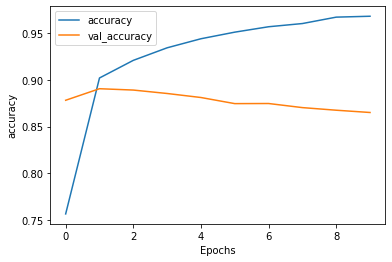

In [0]:
plot_graphs(history, 'accuracy')

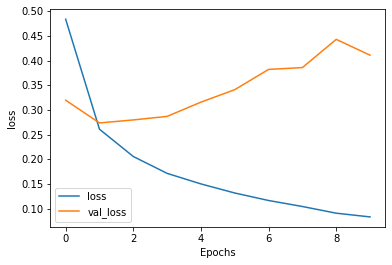

In [0]:
plot_graphs(history, 'loss')